# Process
- ?

In [11]:
import sys
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={"figure.figsize": (26, 10)})

In [12]:
sys.path.append("../")
from cnrdlib import cl_eda as cle

In [13]:
engine = create_engine(f"sqlite:///../data/RawData.db")
df = pd.read_sql_table("SensorData_5min", con=engine, index_col="timestamp")
df.head()

,WIP_temp,DP_temp,Ext_temp,WIP_current,DP_current
timestamp,,,,,
2021-03-30 00:00:00,4.828750,3.028125,17.063750,5.881250,9.741250
2021-03-30 00:05:00,4.299444,3.080000,17.474444,6.122778,9.839444
2021-03-30 00:10:00,4.506471,2.900588,17.605882,5.895000,9.783750
2021-03-30 00:15:00,4.075000,3.020000,17.395000,5.597059,9.704118
2021-03-30 00:20:00,4.044118,3.010000,17.536471,5.254118,8.987647


In [14]:
dfe = pd.read_sql_table("SensorData_1hour", con=engine, index_col="timestamp")
dfe.head()

,WIP_temp,DP_temp,Ext_temp,WIP_currentAh,DP_currentAh,WIP_energy,DP_energy
timestamp,,,,,,,
2021-03-30 00:00:00,5.073109,2.975897,17.275080,4.867222,5.336014,2.866294,3.142364
2021-03-30 01:00:00,7.224663,2.952083,16.797564,5.713958,2.960903,3.364934,1.743668
2021-03-30 02:00:00,5.174319,4.074458,15.969708,4.247333,6.237069,2.501243,3.672993
2021-03-30 03:00:00,7.380833,5.051847,16.267139,5.159278,2.948403,3.038285,1.736306
2021-03-30 04:00:00,5.196708,2.939181,16.383194,5.470403,6.847056,3.221505,4.032212


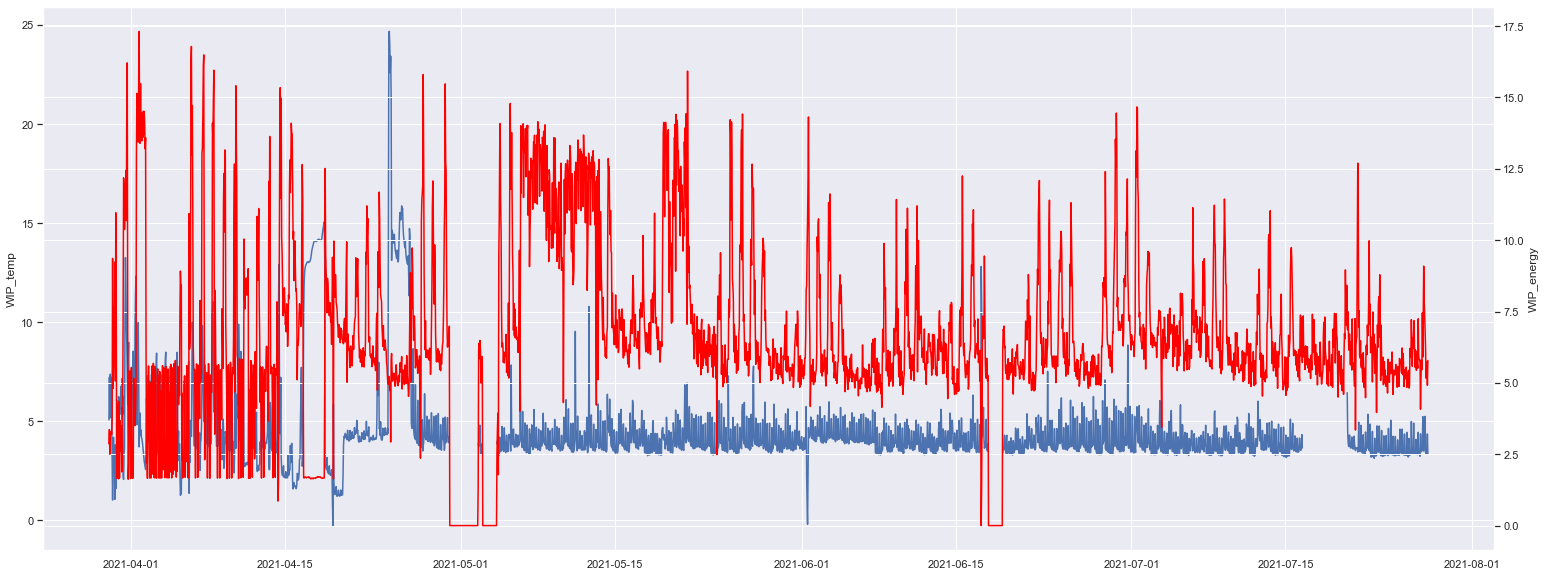

In [15]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(dfe.index, dfe.WIP_temp)
ax2.plot(dfe.index, dfe.WIP_energy, color="red")

# ax1.set_xlabel('X data')
ax1.set_ylabel("WIP_temp")
ax2.set_ylabel("WIP_energy")

plt.show()

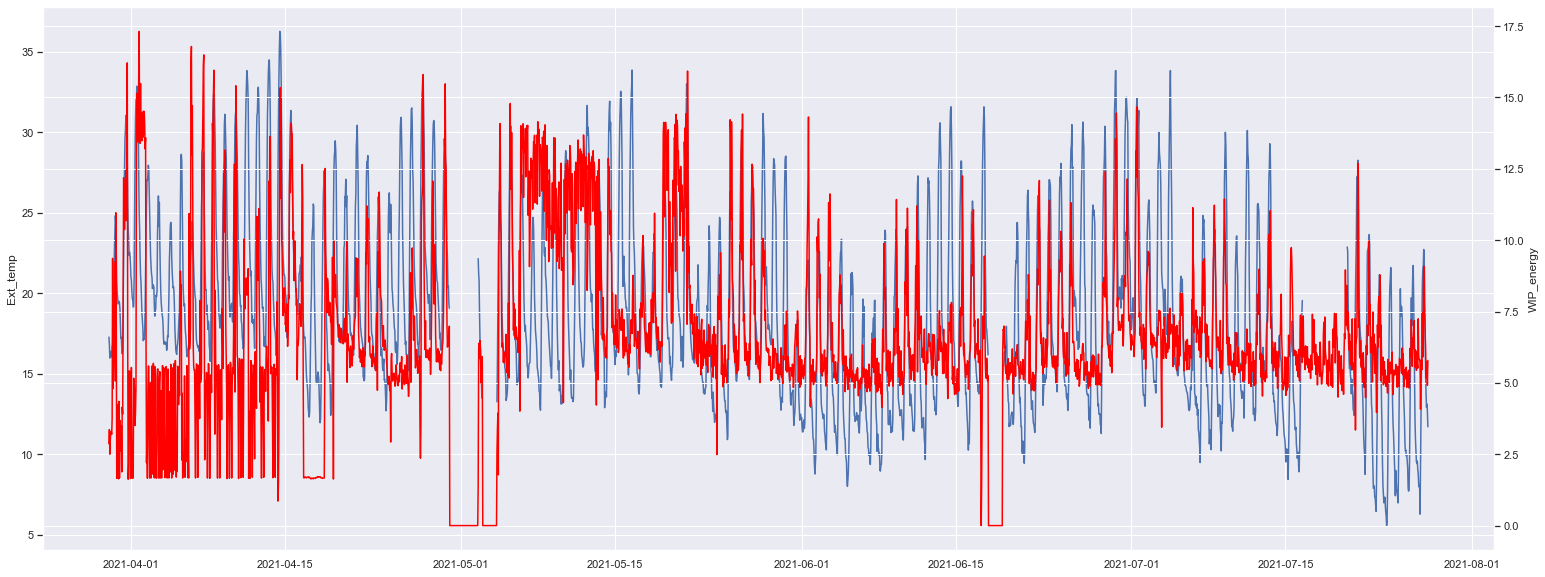

In [16]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(dfe.index, dfe.Ext_temp)
ax2.plot(dfe.index, dfe.WIP_energy, color="red")

# ax1.set_xlabel('X data')
ax1.set_ylabel("Ext_temp")
ax2.set_ylabel("WIP_energy")

plt.show()

In [17]:
import plotly.graph_objects as go

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.WIP_energy, mode='lines', name='energy'))
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.WIP_temp, mode='lines', name='cold room temp'))
fig.show()

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.WIP_energy, mode='lines', name='energy'))
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.Ext_temp, mode='lines', name='external temp'))
fig.show()

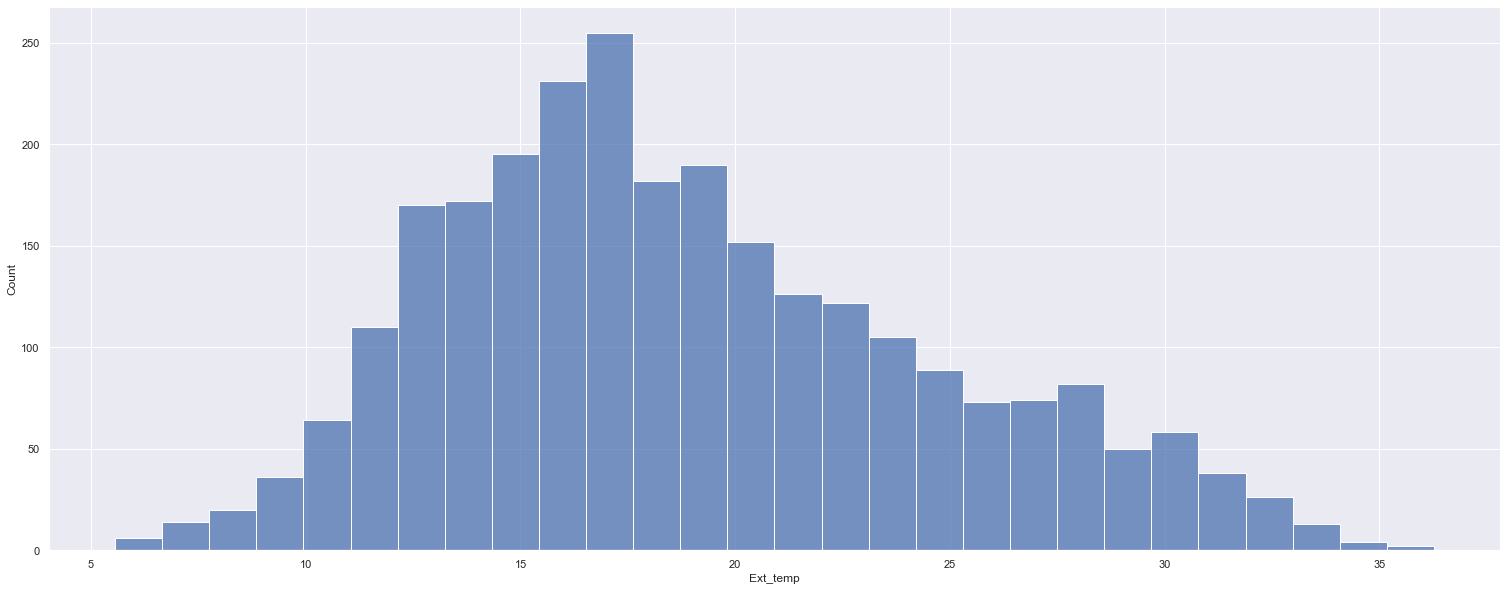

In [19]:
sns.histplot(data=dfe, x="Ext_temp");

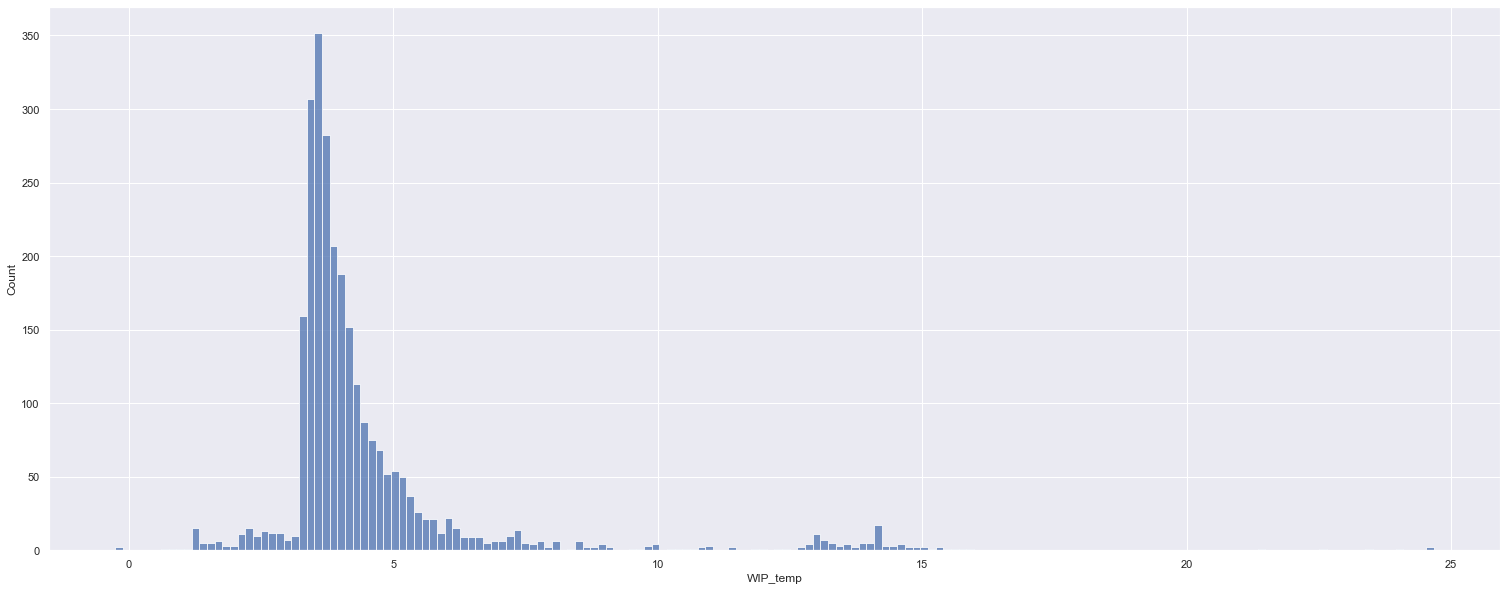

In [20]:
sns.histplot(data=dfe, x="WIP_temp");

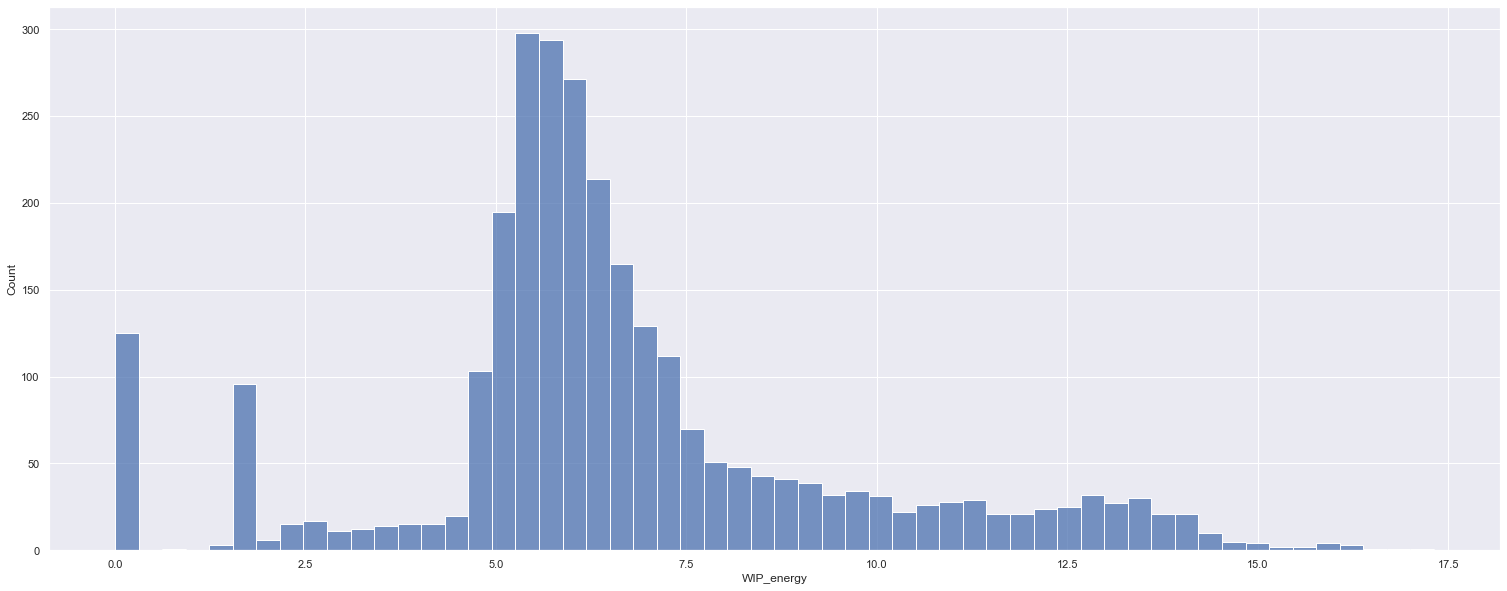

In [21]:
sns.histplot(data=dfe, x="WIP_energy");

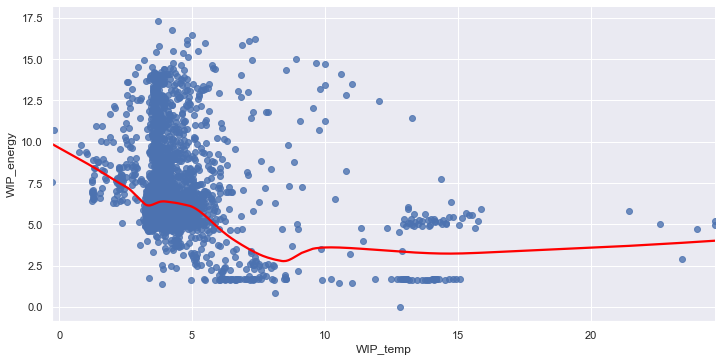

In [22]:
sns.lmplot(x="WIP_temp", y="WIP_energy", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

- The WIP temperature is more an operating parameter rather than a variable that affects energy consumption. 
- The temperature is concentrated around the 4dC mark (the setpoint) and variation in energy consumption can be seen.

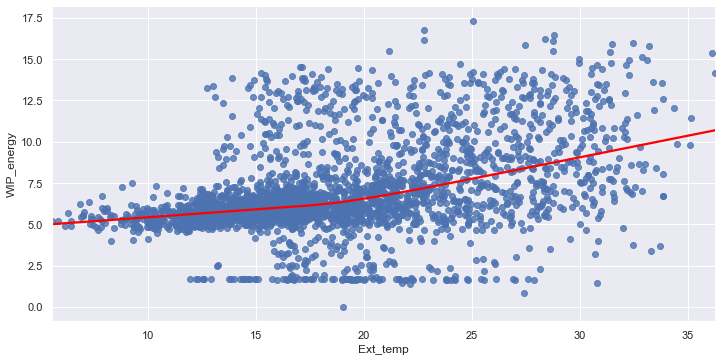

In [23]:
sns.lmplot(x="Ext_temp", y="WIP_energy", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

- Seems to be a correlation between energy and external temperature, which makes sense. The hotter it is outide, the more cooling energy is required. This also depends on the quality of the insulation.
- Other factors that are not measured are the number of times the fridge door is opened and it hot cheese is placed in the cold room.

In [ ]:
# Feature Engineering

In [24]:
dfe.head()

,WIP_temp,DP_temp,Ext_temp,WIP_currentAh,DP_currentAh,WIP_energy,DP_energy
timestamp,,,,,,,
2021-03-30 00:00:00,5.073109,2.975897,17.275080,4.867222,5.336014,2.866294,3.142364
2021-03-30 01:00:00,7.224663,2.952083,16.797564,5.713958,2.960903,3.364934,1.743668
2021-03-30 02:00:00,5.174319,4.074458,15.969708,4.247333,6.237069,2.501243,3.672993
2021-03-30 03:00:00,7.380833,5.051847,16.267139,5.159278,2.948403,3.038285,1.736306
2021-03-30 04:00:00,5.196708,2.939181,16.383194,5.470403,6.847056,3.221505,4.032212


In [25]:
dfe["SEC"] = dfe.WIP_energy / dfe.Ext_temp

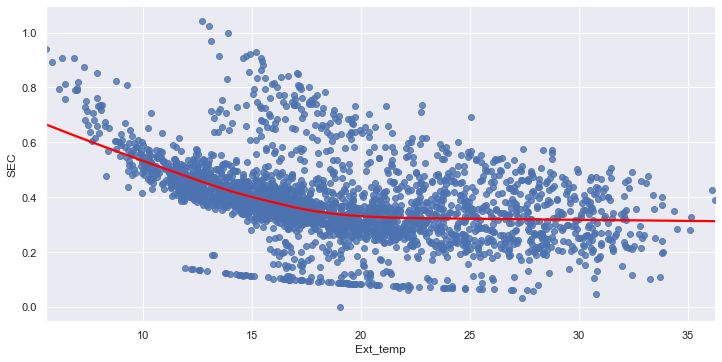

In [26]:
sns.lmplot(x="Ext_temp", y="SEC", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

In [27]:
base_temperature = 4

In [28]:
dfe["CDD"] = dfe.Ext_temp - base_temperature
dfe.head(10)

,WIP_temp,DP_temp,Ext_temp,WIP_currentAh,DP_currentAh,WIP_energy,DP_energy,SEC,CDD
timestamp,,,,,,,,,
2021-03-30 00:00:00,5.073109,2.975897,17.275080,4.867222,5.336014,2.866294,3.142364,0.165921,13.275080
2021-03-30 01:00:00,7.224663,2.952083,16.797564,5.713958,2.960903,3.364934,1.743668,0.200323,12.797564
2021-03-30 02:00:00,5.174319,4.074458,15.969708,4.247333,6.237069,2.501243,3.672993,0.156624,11.969708
2021-03-30 03:00:00,7.380833,5.051847,16.267139,5.159278,2.948403,3.038285,1.736306,0.186774,12.267139
2021-03-30 04:00:00,5.196708,2.939181,16.383194,5.470403,6.847056,3.221505,4.032212,0.196635,12.383194
2021-03-30 05:00:00,7.231542,2.876722,16.146403,5.596389,2.830000,3.295698,1.666579,0.204113,12.146403
2021-03-30 06:00:00,5.729069,2.867722,16.030556,5.429208,8.827097,3.197246,5.198253,0.199447,12.030556
2021-03-30 07:00:00,3.029889,3.018097,16.657806,6.356736,9.017361,3.743465,5.310299,0.224727,12.657806
2021-03-30 08:00:00,1.031431,4.473361,16.815000,15.896917,5.679292,9.361651,3.344519,0.556744,12.815000


In [31]:
dfe["CDD_check"] = 0
dfe["CDD_check"][dfe.CDD > 0] = 1
dfe.head(10)

,WIP_temp,DP_temp,Ext_temp,WIP_currentAh,DP_currentAh,WIP_energy,DP_energy,SEC,CDD,CDD_check
timestamp,,,,,,,,,,
2021-03-30 00:00:00,5.073109,2.975897,17.275080,4.867222,5.336014,2.866294,3.142364,0.165921,13.275080,1
2021-03-30 01:00:00,7.224663,2.952083,16.797564,5.713958,2.960903,3.364934,1.743668,0.200323,12.797564,1
2021-03-30 02:00:00,5.174319,4.074458,15.969708,4.247333,6.237069,2.501243,3.672993,0.156624,11.969708,1
2021-03-30 03:00:00,7.380833,5.051847,16.267139,5.159278,2.948403,3.038285,1.736306,0.186774,12.267139,1
2021-03-30 04:00:00,5.196708,2.939181,16.383194,5.470403,6.847056,3.221505,4.032212,0.196635,12.383194,1
2021-03-30 05:00:00,7.231542,2.876722,16.146403,5.596389,2.830000,3.295698,1.666579,0.204113,12.146403,1
2021-03-30 06:00:00,5.729069,2.867722,16.030556,5.429208,8.827097,3.197246,5.198253,0.199447,12.030556,1
2021-03-30 07:00:00,3.029889,3.018097,16.657806,6.356736,9.017361,3.743465,5.310299,0.224727,12.657806,1
2021-03-30 08:00:00,1.031431,4.473361,16.815000,15.896917,5.679292,9.361651,3.344519,0.556744,12.815000,1


In [35]:
dfe.CDD_check[dfe.CDD_check == 0]

timestamp
2021-04-30 00:00:00    0
2021-04-30 01:00:00    0
2021-04-30 02:00:00    0
2021-04-30 03:00:00    0
2021-04-30 04:00:00    0
                      ..
2021-07-20 10:00:00    0
2021-07-20 11:00:00    0
2021-07-20 12:00:00    0
2021-07-20 13:00:00    0
2021-07-20 14:00:00    0
Name: CDD_check, Length: 221, dtype: int64

In [36]:
dfe["CDD_calc"] = dfe.CDD * dfe.CDD_check

In [37]:
dfe_daily = dfe.resample("D").agg({"CDD_calc": "sum", "WIP_energy": "sum"})
dfe_daily.head()

,CDD_calc,WIP_energy
timestamp,,
2021-03-30,367.787450,110.537098
2021-03-31,461.631917,168.865942
2021-04-01,500.827097,217.912840
2021-04-02,435.263972,180.258004
2021-04-03,401.512639,81.340250


In [39]:
dfe_daily.CDD_calc = dfe_daily.CDD_calc/24
dfe_daily.head()

,CDD_calc,WIP_energy
timestamp,,
2021-03-30,15.324477,110.537098
2021-03-31,19.234663,168.865942
2021-04-01,20.867796,217.912840
2021-04-02,18.135999,180.258004
2021-04-03,16.729693,81.340250


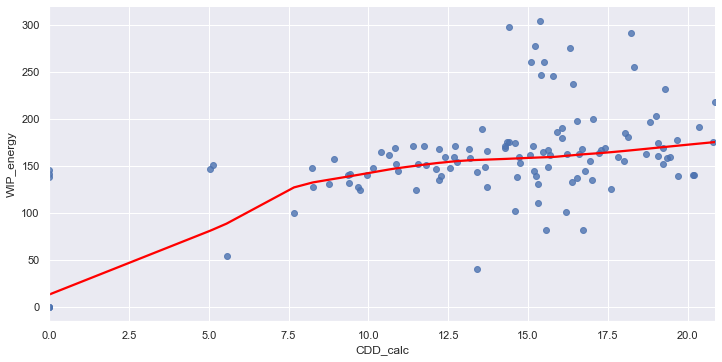

In [40]:
sns.lmplot(x="CDD_calc", y="WIP_energy", data=dfe_daily, aspect=2, lowess=True, line_kws={'color': 'red'});